# QIS Cluster Analysis

## Import Libraries

In [3]:
import os
os.getcwd()
os.chdir('C:\\Users\\HQP6CBS\\Documents\\GitHub\\RMP')

In [19]:
from EquityHedging.datamanager import data_manager as dm
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform
import ipywidgets as widgets
from ipywidgets import interact


## Import Normalized Hedge Metrics

In [8]:
file_path = dm.EQUITY_HEDGE_DATA+'def_uni_hedge_metrics_more.xlsx'
#normalized_hm = pd.read_excel(dm.EQUITY_HEDGE_DATA+'def_uni_hedge_metrics_more.xlsx', index_col=(0))
normalized_hm = pd.read_excel(dm.QIS_UNIVERSE +'Normalized_Hedge_Metrics.xlsx', index_col=(0))
features = ['Downside Reliability', 'Upside Reliability', 'Convexity', 'Cost', 'Decay']
normalized_hm = normalized_hm[features]
normalized_hm.head(20)

,Downside Reliability,Upside Reliability,Convexity,Cost,Decay
BXIIUWFH Index,0.845629,0.442828,0.001556,0.952677,1.000000
BXIIRWVH Index,0.790128,0.409023,0.001557,0.940718,1.000000
BXIIESFH Index,0.708328,0.531921,0.001306,0.957960,1.000000
BXIIUVR2 Index,0.527790,0.526339,1.000000,0.000000,0.101370
BEFSDHVD Index,0.661711,0.497651,0.018968,0.885105,0.687671
BXIIWFHU Index,0.589812,0.501253,0.001812,0.958770,0.531507
BXIIWHIC Index,0.587520,0.495994,0.001346,0.958411,0.271233
BXIIWFH2 Index,0.590719,0.502852,0.003914,0.915600,0.410959
BXIIWFH3 Index,0.591646,0.504603,0.006097,0.872037,0.410959
BXIIUFHU Index,0.547069,0.479792,0.004272,0.924251,0.063014


In [22]:

# Read the data into a DataFrame
#file_path = dm.EQUITY_HEDGE_DATA + 'def_uni_hedge_metrics_more.xlsx'
normalized_hm = pd.read_excel(dm.QIS_UNIVERSE +'Normalized_Hedge_Metrics.xlsx', index_col=(0))

# Select only the features of interest
features = ['Downside Reliability', 'Upside Reliability', 'Convexity', 'Cost', 'Decay']
normalized_hm = normalized_hm[features]

# Calculate the pairwise distances between strategies
distances = pdist(normalized_hm)

# Convert the pairwise distances to a square distance matrix
square_distances = squareform(distances)

# Perform hierarchical clustering using linkage on the square distance matrix
linked = linkage(square_distances, 'ward')

# Calculate the sum of features for each strategy (row-wise sum)
normalized_hm['Sum'] = normalized_hm.sum(axis=1)

# Drop the individual feature columns, as we won't need them for clustering
normalized_hm.drop(features, axis=1, inplace=True)

# Define the number of clusters you want to create (you can adjust this value)
num_clusters = 10

# Assign each strategy to a cluster based on the linkage results
clusters = fcluster(linked, t=num_clusters, criterion='maxclust')

# Add the cluster assignment to the DataFrame
normalized_hm['Cluster'] = clusters

# Find the best performing strategy in each cluster based on the highest sum of features
best_strategies = normalized_hm.groupby('Cluster')['Sum'].idxmax()

# Get the rows corresponding to the best strategies
best_performing_strategies = normalized_hm.loc[best_strategies]

# Display the DataFrame with the best performing strategies in each cluster
print(best_performing_strategies)

C:\Users\HQP6CBS\AppData\Local\Temp\ipykernel_16856\613046272.py:16: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



                                                         Sum  Cluster
BNP Short Strangle US Equity TR Index 3  BNPISS...  2.753606        1
BNP Risk Reversal US Index  BNPIRRUS Index          3.376554        2
Barclays US Long Short Variance Relative Value ...  2.155499        3
UBS US Front End DH Risk Reversal  XUBSUFRR index   2.564044        4
BNP Rolling Call US T-Note ER Index  BNPIRCTN I...  2.417436        5
Citi Cross-Asset Mean-Reversion Index  CIMAXAMR...  2.337785        6
BNP TIER US Index  BNPITIU1 Index                   3.796427        7
JPM Credit Europe Main Option Carry Index  JCRE...  2.790821        8
BNP TIER Dynamic EU ESG Index  BNPXTEED Index       3.148553        9
JPM Single Name CDS Global Multi-Factor IG Inde...  3.054276       10


In [26]:
normalized_hm = pd.read_excel(dm.QIS_UNIVERSE + 'Normalized_Hedge_Metrics.xlsx', index_col=0)

features = ['Downside Reliability', 'Upside Reliability', 'Convexity', 'Cost', 'Decay']
normalized_hm = normalized_hm[features]

# Calculate the pairwise distances between strategies
distances = pdist(normalized_hm)

# Convert the pairwise distances to a square distance matrix
square_distances = squareform(distances)

# Perform hierarchical clustering using linkage on the square distance matrix
linked = linkage(square_distances, 'ward')

# Calculate the sum of features for each strategy (row-wise sum)
normalized_hm['Sum'] = normalized_hm.sum(axis=1)

normalized_hm.drop(features, axis=1, inplace=True)

num_clusters = 25

clusters = fcluster(linked, t=num_clusters, criterion='maxclust')

normalized_hm['Cluster'] = clusters


best_strategies = normalized_hm.groupby('Cluster')['Sum'].idxmax()

# Get the rows corresponding to the best strategies
best_performing_strategies = normalized_hm.loc[best_strategies]

print("Best Performing Strategies in Each Cluster:")
print(best_performing_strategies)

#  function to display the strategies in the selected cluster
def show_strategies_in_cluster(selected_cluster):
    selected_strategies = normalized_hm[normalized_hm['Cluster'] == selected_cluster].index.tolist()
    print(f"\nCluster {selected_cluster} Strategies:")
    print(selected_strategies)

#  a dropdown widget for selecting different cluster numbers
cluster_dropdown = widgets.Dropdown(
    options=normalized_hm['Cluster'].unique(),
    description='Select Cluster:',
    value=num_clusters,  # Default value is the total number of clusters
)


interact(show_strategies_in_cluster, selected_cluster=cluster_dropdown);

C:\Users\HQP6CBS\AppData\Local\Temp\ipykernel_16856\4055174385.py:13: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



Best Performing Strategies in Each Cluster:
                                                         Sum  Cluster
BNP Short Strangle US Equity TR Index 3  BNPISS...  2.753606        1
JPM U.S. Volatility Momentum QES Long Only Flat...  1.790544        2
Macquarie Long 12m SPX Put Overlay  VMAQLSP1 Index  1.654164        3
BNP Risk Reversal US Index  BNPIRRUS Index          3.376554        4
UBS Defensive Portfolio Core  XUBSDFCR index        1.083223        5
Barclays US Long Short Variance Relative Value ...  2.155499        6
UBS US Front End DH Risk Reversal  XUBSUFRR index   2.564044        7
Macquarie Gold intraday Momentum Windows H  MQC...  2.443200        8
Citi HYG Volatility Carry Index  CIEQVHG1 Index     2.521490        9
FX G10 Value  FXFTDMVA Index                        2.524169       10
Macquarie Commodity Minimum Drawdown Carry (ex ...  2.138669       11
BNP Rolling Call US T-Note ER Index  BNPIRCTN I...  2.417436       12
Citi Cross-Asset Mean-Reversion Index  CIMAXAM

interactive(children=(Dropdown(description='Select Cluster:', index=16, options=(17, 18, 6, 21, 19, 10, 7, 13,…

In [25]:
normalized_hm

,Sum,Cluster
Barclays Weekly Short Var Hourly Index BXIIUWFH Index,3.242690,17
Barclays US Small Cap Weekly Var Hourly Index BXIIRWVH Index,3.141426,17
Barclays Eurozone Weekly Short Var Hourly Index BXIIESFH Index,3.199514,18
Barclays US Long Short Variance Relative Value Strategy BXIIUVR2 Index,2.155499,6
Barclays VIX Options Risk Premium Series II Strategy Excess Return BEFSDHVD Index,2.751106,21
...,...,...
VRR Trend,1.955109,11
Corr Hedge,2.712871,18
Def Var,2.609247,16
Commodity Basket,2.808343,21


In [28]:

# Assume you have your data stored in a numpy array called 'data'
# Perform hierarchical clustering
#Z = linkage(data, method='ward')
links = shc.linkage(normalized_hm, method = 'ward')
# Set a threshold to determine the number of clusters 
threshold = 2.5  
# You can adjust this value based on your data and requirements

# Retrieve cluster labels for each data point 
clusters = fcluster(links, threshold, criterion='distance')


In [29]:
normalized_hm['Cluster'] = list(clusters)

In [30]:
normalized_hm

,Sum,Cluster
Barclays Weekly Short Var Hourly Index BXIIUWFH Index,3.242690,10
Barclays US Small Cap Weekly Var Hourly Index BXIIRWVH Index,3.141426,10
Barclays Eurozone Weekly Short Var Hourly Index BXIIESFH Index,3.199514,11
Barclays US Long Short Variance Relative Value Strategy BXIIUVR2 Index,2.155499,22
Barclays VIX Options Risk Premium Series II Strategy Excess Return BEFSDHVD Index,2.751106,6
...,...,...
VRR Trend,1.955109,15
Corr Hedge,2.712871,11
Def Var,2.609247,9
Commodity Basket,2.808343,6


In [31]:

# Create the dendrogram figure
dendro_fig = ff.create_dendrogram(links, orientation='bottom')

# Add custom hover text to the dendrogram
dendro_fig.update_traces(hovertext=dendro_fig['data'][0]['text'])

# Customize the layout
dendro_fig.update_layout(width=800, height=700, title='Dendrogram')

# Define a callback function for hover events
def hover_callback(trace, points, state):
    ind = points.point_inds[0]
    cluster_num = clusters[ind]
    strategies = normalized_hm[normalized_hm['Cluster'] == cluster_num].index.tolist()
    tooltip = f"Cluster {cluster_num} Strategies: <br>" + "\n".join(strategies)
    trace.set_hovertext(tooltip)
# Add the callback to the dendrogram
dendro_fig.data[0].on_hover(hover_callback)

# Set the x-axis labels to the names of the strategies
layout = dendro_fig.layout
layout.xaxis.ticktext = normalized_hm.index.tolist()


# Show the dendrogram
dendro_fig.show()

## Find what strats are in each cluster
find what strats rank highest in each cluster 
best in each metric
best over all

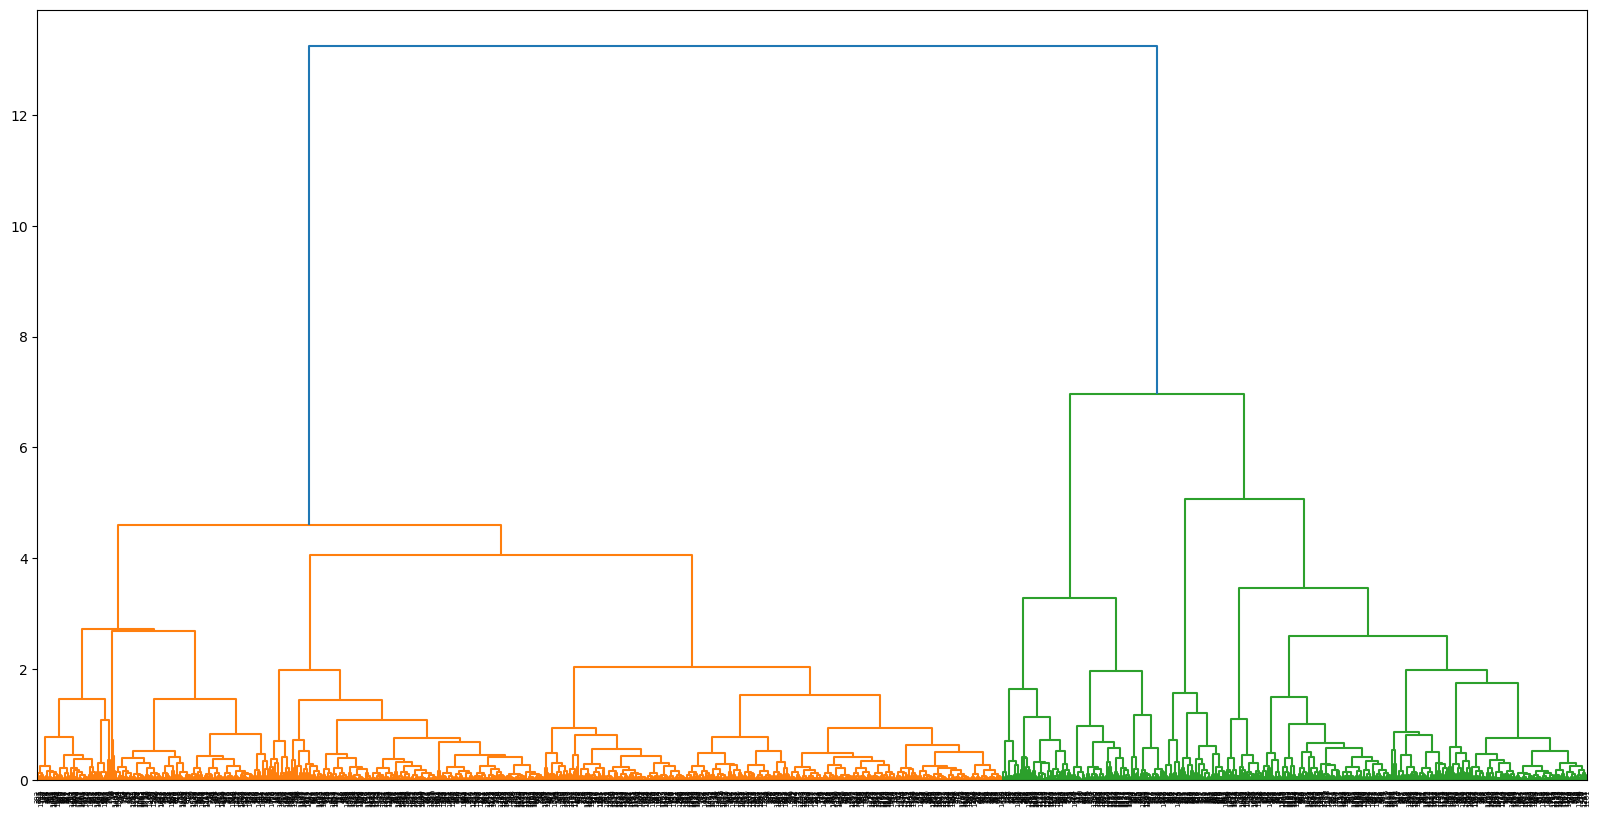

In [7]:
fig = plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
dend = shc.dendrogram(links)

In [8]:
# Add a callback function to the dendrogram
def on_click(event):
    if event.mouseevent.button == 1:
        ind = event.ind[0]
        cluster_num = clusters[ind]
        strategies = normalized_hm[normalized_hm['Cluster'] == cluster_num].index.tolist()
        print(f"Cluster {cluster_num} Strategies: {strategies}")

fig.canvas.mpl_connect('pick_event', on_click)
plt.show()

## Dendrogram 

## Principal Component Analysis

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_hm)

In [ ]:
X_principal = pd.DataFrame(X_principal, index = normalized_hm.index)
X_principal.columns = ['P1', 'P2']

In [ ]:
X_principal

## Elbow Method

In [ ]:
inertia = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(normalized_hm)
    kmeanModel.fit(normalized_hm)
    inertia.append(kmeanModel.inertia_)
    
    # Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

## Determine amount of clusters

In [ ]:
# input clusters here
ncluster = 3

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'ward')
X_principal['Cluster'] = ac2.fit_predict(X_principal)
X_principal2 = X_principal.copy()
X_principal2['Strat'] = list(X_principal.index)
X_principal2

## Agglomerative Clustering 

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'ward')
fig = px.scatter(X_principal2, x= 'P1',y ='P2', 
                 color = ac2.fit_predict(X_principal), hover_data = ['Strat'])
fig

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'single')
fig = px.scatter( x= X_principal['P1'],y =X_principal['P2'], color = ac2.fit_predict(X_principal))
fig

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'complete')
fig = px.scatter( x= X_principal['P1'],y =X_principal['P2'], color = ac2.fit_predict(X_principal))
fig

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'average')
fig = px.scatter( x= X_principal['P1'],y =X_principal['P2'], color = ac2.fit_predict(X_principal))
fig